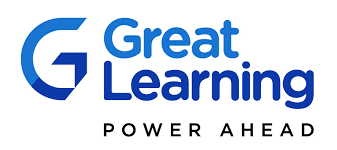

# **Hands-on Project: Fake News Detection using LSTMs**

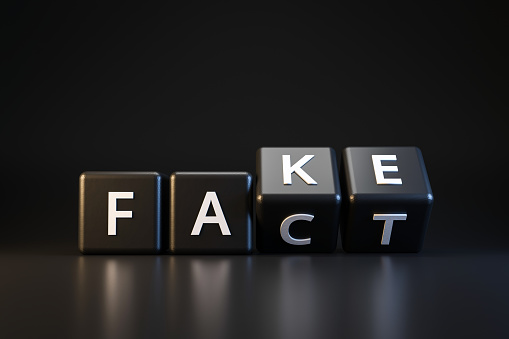

## **Context:**

In today's digital age, we are living in an era where information is available at our fingertips, thanks to social media and the internet. While this may seem like a boon for knowledge seekers, it has also led to the rise of a troubling phenomenon; fake news. **Fake news refers to false information that is deliberately spread to mislead people and shape their opinions.**

The impact of fake news cannot be underestimated. It can spread like wildfire and cause widespread panic and misinformation, leading to undesirable consequences. In recent times, we have seen how fake news has affected the political landscape, with misinformation campaigns and propaganda being used to manipulate public opinion and sway elections.

One of the most significant challenges in combating fake news is its ability to mimic real news. Fake news can be written in a way that appears legitimate, making it difficult for people to identify it as false. This is particularly true in today's era of social media, where the line between reliable sources and questionable sources is often blurred.

Businesses and organizations need to be particularly vigilant about fake news because it can have severe consequences. Decisions based on false information can result in financial losses, damage to reputation, and even legal issues. By detecting fake news, businesses can avoid making critical decisions based on misinformation and prevent potential damage to their bottom line.


## **Problem Statement:**

As a data scientist, you have been hired by a social media manager of a large company to detect instances of fake news that could harm the reputation of their brand. The task requires you to apply your expertise in data science and advanced NLP techniques to develop an effective solution for detecting fake news.


## **Dataset:**

WELFake is a dataset of 72,134 news articles with 35,028 real and 37,106 fake news. To prepare this dataset, the authors merged four popular news datasets (i.e. Kaggle, McIntire, Reuters, BuzzFeed Political) to prevent over-fitting of classifiers and to provide more text data for better ML training. The dataset contains four columns: Serial number (starting from 0); Title (about the text news heading); Text (about the news content); and Label (0 = fake and 1 = real).

## **Notebook Content & Flow**

1. [Importing the Libraries](#import)


2. [Reading the Dataset](#read_df)


3. [Merging Columns](#merging_data)
    

4. [Preprocessing the Text Data](#clean_data)
    

5. [Exploratory Data Analysis](#EDA)
    

6. [Preparing the input](#splitting)


7. [Tokenization](#Tokenization)


8. [Building and Evaluating the LSTM Model](#model_building)
    * 8.1 [Define the Model](#defining_model)
    * 8.2 [Compiling the Model](#compiling_model)
    * 8.3 [Plotting the Architecture](#plotting_architecture)
    * 8.4 [Training the Model](#training_model)
    * 8.5 [Plotting the Accuracy](#plotting_accuracy)
    * 8.6 [Evaluating the Model](#evaluating_model)
    * 8.7 [Classification Report](#classification_report)
    * 8.8 [Plotting the Confusion Matrix](#confusion_matrix)
    
    
9. [Conclusions and Learnings](#Conclusions_and_Learnings)

In [11]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


<a id='import'></a>

## **1. Importing the Libraries**

### **Q1: Import the necessary libraries and briefly explain the use of each library (5 marks)**

In [12]:
### Add your code here

# Importing the required the libraries

# To read and manipulate the data
import pandas as pd
pd.set_option('max_colwidth', None)

# To visualise the graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Helps to display the images
#from PIL import Image

# Helps to extract the data using regular expressions
import re

# Helps to remove the punctuation
import string

# It helps to remove the accented characters
!pip install unidecode
import unidecode

# It help to correct the spellings
!pip install autocorrect
from autocorrect import Speller


# Importing the NLTK library
import nltk

nltk.download('stopwords')    # Loading the stopwords
nltk.download('punkt')        # Loading the punkt module, used in Tokenization
nltk.download('omw-1.4')      # Dependency for Tokenization
nltk.download('wordnet')      # Loading the wordnet module, used in stemming and lemmatization

from nltk.corpus import stopwords

# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Used in Stemming
#from nltk.stem.porter import PorterStemmer

##from nltk.stem import SnowballStemmer

#from nltk.stem import LancasterStemmer

# Used in Lemmatization
#from nltk.stem import WordNetLemmatizer

# Used in Tokenization
from nltk.tokenize import word_tokenize, sent_tokenize

# Importing the SpaCy library
import spacy

nlp = spacy.load('en_core_web_sm')  # Loading the envrionment config

# Used in tokenization
from spacy.lang.en import English
en_nlp = English()

# Helped to create train and test data
from sklearn.model_selection import train_test_split

# Importing the Random Forest model
#from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Explanation of the libraries:
1.  Pandas: It provides easy-to-use data structures and data analysis tools for efficiently working with structured data.

2. pd.set_option('max_colwidth', None): This statement is used to set the display option of pandas to show the full content of each column when displaying a DataFrame. By setting the 'max_colwidth' option to None, it allows displaying the entire content of each column, regardless of its length. This can be useful when working with text data that might have long text entries, ensuring that no truncation occurs when displaying the data. By default, pandas truncates the displayed contents of a DataFrame column if the content is longer than a specified threshold. However, using pd.set_option('max_colwidth', None) overrides this behavior and allows the full content of each column to be displayed without truncation.

3. matplotlib.pyplo: The pyplot module within Matplotlib provides a simple interface for creating various types of plots, such as line plots, scatter plots, bar plots, histograms, and more. It allows customization of plot appearance, labeling, axes, titles, and legends.

4. Seaborn: A Python data visualization library that is built on top of Matplotlib. It provides a high-level interface for creating visually appealing statistical graphics.

5. PIL (Python Imaging Library): PIL is a powerful library for working with images in Python. It provides a wide range of functions and methods for opening, manipulating (resizing, cropping, rotating, filtering, and enhancing images), and saving different image file formats.

6. 're' module: The re module in Python provides functions and methods to work with regular expressions. It allows you to compile regular expressions into pattern objects, which can be used for various operations. The re module provides functions such as match(), search(), and findall() for searching and extracting patterns from strings, as well as functions like sub() for replacing patterns with specified text.

7. The string module: It provides a collection of useful constants and functions for working with strings. The string module provides a collection of useful constants and functions for working with strings.

9. The unidecode module is a Python library that provides a function for transliterating Unicode characters into their closest ASCII equivalents.

10. The autocorrect library provides functionality for automatic spelling correction and suggestion.

11. NLTK: NLTK is a comprehensive library for natural language processing (NLP) tasks in Python. It provides a wide range of functionalities and resources for tasks such as tokenization, stemming, lemmatization, part-of-speech tagging, parsing, identifying stop words, punctuations and more. NLTK is widely used for text analysis, language modeling, and building NLP applications.
The 'omw-1.4' download specifically provides WordNet data for multilingual applications.
'wordnet': This download loads the WordNet corpus, which is a large lexical database of English words.

12.  A word cloud provides a visual summary of the most frequent words in a text corpus, where the size of each word in the cloud is proportional to its frequency or importance.

13. word_tokenize and sent_tokenize are functions that help with tokenization, which is the process of splitting text into individual words (tokens) or sentences.

14. Spacy: It provides efficient and high-performance tools for various NLP tasks, such as tokenization, part-of-speech tagging, named entity recognition, syntactic parsing, and text classification.

15. sklearn.model_selection (train_test_split): The train_test_split function is commonly used for splitting a dataset into training and testing sets.

16. sklearn.metrics (accuracy_score, classification_report): These functions are commonly used for evaluating the performance of classification models.





## **2. Reading the Dataset**

<a id='read_df'></a>
### **Q2: Read the WELFake dataset and print initial information using Pandas (5 marks)**

In [13]:
!pwd

/content


In [14]:
ls /content

drive/  sample_data/  WELFake_Dataset.csv  WELFake_Dataset.zip


In [15]:
###The data is provided as a zip file
#Navigate to the directory where the zip file is located. The file has been
#imported in content.

import os

#Unzip the file:
import zipfile

path = "WELFake_Dataset.zip"

# Extract the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
  zip_ref.extractall()


# Read the contents of the unzipped file into a DataFrame
file_path = "/content/WELFake_Dataset.csv"
df = pd.read_csv(file_path)

In [16]:
# Print shape of data
df.shape

#One could also use the following:
#print("Number of records: ", df.shape[0])
#print("Number of fields: ", df.shape[1])

(72134, 4)

In [17]:
df.head()

Unnamed: 0  \
0           0   
1           1   
2           2   
3           3   
4           4   

                                                                                                                                       title  \
0         LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO]   
1                                                                                                                                        NaN   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO]   
3                                  Bobby Jindal, raised Hindu, uses story of Christian conversion to woo evangelicals for potential 2016 bid   
4                                            SATAN 2: Russia unvelis an image of its terrifying new ‘SUPERNUKE’ – Western world takes notice   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [18]:
#Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [19]:
# checking for duplicate values
df.duplicated().sum()

0

OBSERVATIONS:

- There are four columns. Unnamed and Label columns have integer values. Title and text columns are objects.
- Some of the strings are empty. There are no duplicate values.

<a id='merging_data'></a>
## **3. Merging the Columns**
### **Q3: Merge the columns - title and text (5 marks)**

In [20]:
### Add your code here
df['text'] = df['title'] + ' ' + df['text']

In [21]:
print(df['text'].iloc[0])

LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO] No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39

OBSERVATIONS:
Text and title columns have been merged so that all the text data can be used as a single input variable.

<a id='clean_data'></a>

## **4. Preprocessing the Text Data**

### **Q4: Preprocess the values of the text & headline columns (5 marks)**
- Remove unwanted characters
- Convert text to lowercase
- Remove unwanted spaces
- Remove stopwords
- Replace empty strings with Null
- Drop null values from the dataframe
- Delete duplicate rows

In [22]:
import re
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

def preprocess_text(df, column_name=''):

  # Replace empty strings with Null
  ### Add your code here

  df['text'] = df['text'].replace('', np.nan)



  # Drop Null values
  ### Add your code here
  df.dropna(inplace=True)

  # Select only alphabets
  ### Add your code here
  df['text'] = df['text'].str.replace(r'[^a-zA-Z\s]', '', regex=True)


  # Convert text to lowercase
  ### Add your code here
  df['text'] = df['text'].str.lower()


  # Strip unwanted spaces
  ### Add your code here
  df['text'] = df['text'].str.strip()


  # Remove stopwords
  ### Add your code here
 # def remove_stopwords(text):
  #  tokens = text.split()
 #   filtered_tokens = [token for token in tokens if token.lower() not in stopwords_set]
   # return ' '.join(filtered_tokens)
#
    # Apply the remove_stopwords function to the 'merged_column' column
 # df['merged_column'] = df['merged_column'].apply(remove_stopwords)

  # delete duplicate rows
  ### Add your code here
  df.drop_duplicates(inplace=True)


  return df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Use the `preprocess_text` function on text column

In [23]:
df = preprocess_text(df, column_name='text')

In [24]:
df[['text', 'label']].head()

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            law enforcement on high alert following threats against cops and whites on by blacklivesmatter and fyf terrorists video no comment is expected from barack obama members of the fyf or fukyoflag and blacklivesmatter movements called for the lynching and hanging of white people and cops they encouraged others on a radio show tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in americaone of the fyoflag organizers is called  sunshine  she has a radio blog show hosted from texas called  sunshine s fing opinion radio show a snapshot of her fyf lolatwhitefear twitter page at  pm shows that she was urging supporters to  call now fyf tonight we continue to dismantle the illusion of white below is a snapshot twitter radio call invite   fyfthe radio show aired at  pm eastern standard timeduring the show callers clearly call for  lynching  and  killing  of white peoplea  minute clip from the radio show can be heard here it was provided to breitbart te

In [25]:
#checking the column for null values using the isnull() function:

null_values = df['text'].isnull().sum()
print("Number of null values:", null_values)

Number of null values: 0


OBSERVATIONS:

- Empty strings have been replaced by Null, and the null values have been dropped from the dataframe.
- Only alphabets have been retained for analysis. Unwanted spaces, stopwords and duplicate rows have been removed.
- All the texts have been converted into lower case.
- Transforming raw text into a clean, normalized format is important for analysis and modeling.

<a id='EDA'></a>

## **5. Exploratory Data Analysis**

### **Q5: Perform EDA on the data**

### **Q5.1: Create a Word Cloud for the entire `text` column (5 marks)**

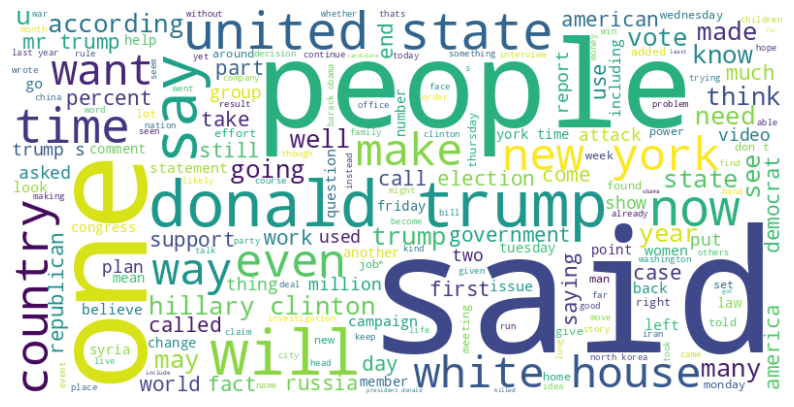

In [26]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

all_news = ' '.join(text for text in df['text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_news)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The wordcloud shows that the most frequently occuring words are 'said', 'people', 'one'.

### **Q5.2: Create separate Word Clouds for Fake News and Real News (5 marks)**

In [27]:
fake_news = df[df['label'] == 0]
real_news = df[df['label'] == 1]

In [28]:
fake_texts = ' '.join(text for text in fake_news['text'])
### Add your code below
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_texts)


In [29]:
real_texts = ' '.join(text for text in real_news['text'])
### Add your code below
real_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(real_texts)



### **Q5.3: Plot the distribution of Fake & Real News (5 marks)**

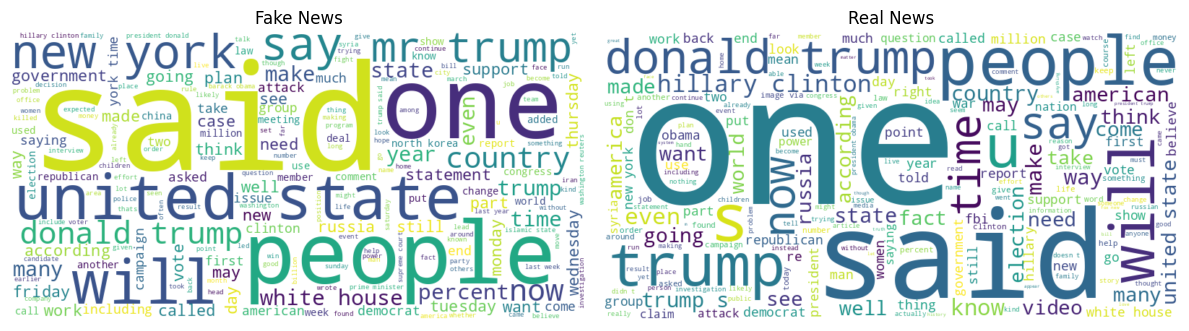

In [30]:
### Add your code here
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(fake_wordcloud, interpolation='bilinear')
axes[0].set_title('Fake News')
axes[0].axis('off')

axes[1].imshow(real_wordcloud, interpolation='bilinear')
axes[1].set_title('Real News')
axes[1].axis('off')

plt.tight_layout()
plt.show()

OBSERVATIONS:

- Wordclouds have been created separately for fake and real news.

- Although the words appearing most frequently are similar in both the categories, certain differences can be observed. Eg.: The words united state, new york occurs much more in the fake news as compared to the real news.

### **Q5.4: Plot the distribution of the News Words count (5 marks)**

In [31]:
df['num_words'] = df['text'].apply(lambda x: len(x.split()))

<ipython-input-32-d30917afed73>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='num_words', bins = range(1, 3000, 50), palette = 'Set1', alpha = 0.8)


Text(0.5, 1.0, 'Distribution of the News Words count')

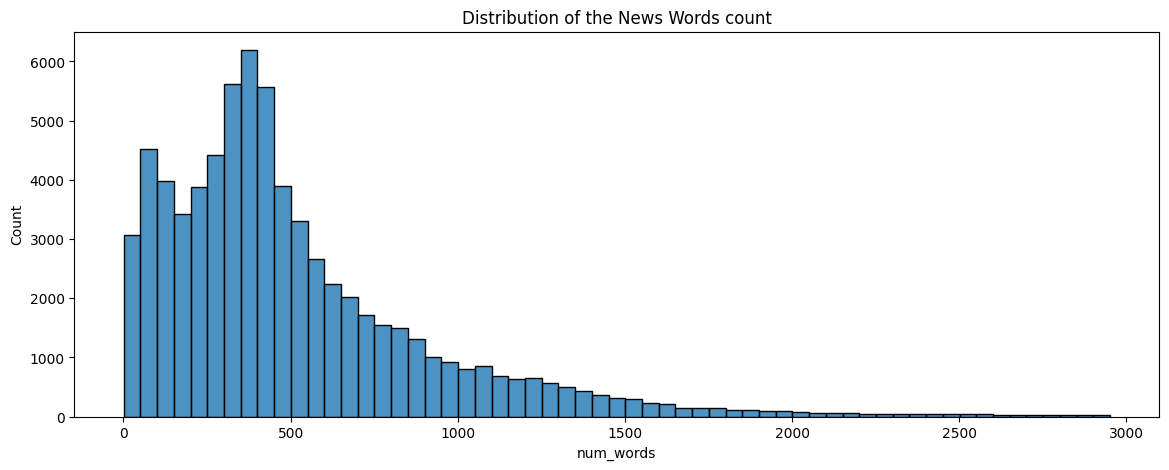

In [32]:
plt.figure(figsize = (14,5))
sns.histplot(data=df, x='num_words', bins = range(1, 3000, 50), palette = 'Set1', alpha = 0.8)
plt.title('Distribution of the News Words count')

OBSERVATIONS:

- We have created a new column named 'num_words' in the DataFrame 'df'.

- It calculates the number of words in each text entry of the 'text' column using the apply() function and a lambda function.

- It splits the text by whitespace and counts the resulting words.

- The above plot shows the distribution of the word count in the  'num_words' column of the DataFrame 'df'.

<a id='splitting'></a>

## **6. Preparing the input (5 marks)**

### **Q6: Splitting the dataset into the training and testing set**

In [33]:
from sklearn.model_selection import train_test_split


X = df['text']
y = df['label']

In [34]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [35]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (53652,)
y_train shape: (53652,)
X_test shape: (17885,)
y_test shape: (17885,)


OBSERVATIONS:

- 75% of the data (53652 rows) will be used for training ang 25% of the data (17885 rows) will be used for testing.

- The 'random_state' parameter is set to 42 to ensure reproducibility of the split.

<a id='Tokenization'></a>

## **7. Tokenization (5 marks)**

### **Q7: Perform the below mentioned operations:**
- Define a Tokenizer
- Fit the Tokenizer on training data
- Tokenize the sentences using the trained tokenizer object
- Print the size of the vocabulary

In [36]:
# Define Keras Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer

tok = Tokenizer()

# Fit the Tokenizer on training data
tok.fit_on_texts(X_train) #This step updates the tokenizer's internal vocabulary based on the text data in X_train.

# Tokenize the sentences using the trained tokenizer object
sequences = tok.texts_to_sequences(X_train) #stores the tokenized sequences of the training data,
test_sequences = tok.texts_to_sequences(X_test) #stores the tokenized sequences of the testing data.

# print size of the vocabulary
print("Size of the vocabulary:", len(tok.word_index)) #len returns the total number of unique words in the vocabulary.

Size of the vocabulary: 298495


 OBSERVATIONS:

 - The Tokenizer class is used for tokenizing text data and converting it into a sequence of tokens. The fit_on_texts method of the Tokenizer object tok is called with the training data X_train as input. This step updates the tokenizer's internal vocabulary based on the text data in X_train. It assigns a unique index to each word in the vocabulary.

- The texts_to_sequences takes the training data X_train and testing data X_test as input and returns the tokenized sequences. Each sequence is a list of integers, where each integer represents the index of a word in the tokenizer's vocabulary.


- This code prints the size of the vocabulary, which represents the total number of unique words in the tokenizer's vocabulary. The word_index attribute of the Tokenizer object tok contains a dictionary mapping words to their corresponding indices.

- The tokenized sequences is useful for further processing, such as padding, embedding, and eventually training the neural network model to classify the news into fake and real.

### **Pad sequences to fixed length**

In [37]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# maximum sequence length (512 to prevent memory issues and speed up computation)
MAX_LEN = 512

# padded sequences
X_train_seq = pad_sequences(sequences, maxlen=MAX_LEN)
X_test_seq = pad_sequences(test_sequences, maxlen=MAX_LEN)

In [38]:
X_train_seq.shape

(53652, 512)

OBSERVATIONS:

- The function 'pad_sequences' pads or truncates the sequences to ensure they have a uniform length of MAX_LEN. Padding is added at the beginning or truncation is performed from the end of the sequences.

- The pad_sequences function is called with the sequences and test_sequences as inputs, representing the tokenized sequences of the training and testing data, respectively.

- After executing this code, X_train_seq and X_test_seq will contain the padded sequences of the training and testing data, respectively. These padded sequences will be used as input for feeding into the NN. The uniform length of the sequences is useful for maintaining consistent input dimensions in machine learning models.

<a id='model_building'></a>

## **8. Building and Evaluating the LSTM Model to Predict Fake News**

### **Q8: Define and compile the LSTM model, get predictions, and evaluate the output.**

<a id='defining_model'></a>

### **Q8.1: Perform the below mentioned operations: (5 marks)**
- Define a sequential model
- Add an Embedding layer
- Add a Dropout layer
- Add an LSTM layer
- Add a Dropout layer
- Add a Dense layer
- Print model summary

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense

embedding_vector_features=40

# Creating model Using LSTM
model= Sequential()

model.add(Embedding(len(tok.word_index), embedding_vector_features, input_length=MAX_LEN))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 512, 40)           11939800  
                                                                 
 dropout (Dropout)           (None, 512, 40)           0         
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 11,996,301
Trainable params: 11,996,301
Non-trainable params: 0
_________________________________________________________________
None



- We have created a Sequential model is a linear stack of layers in Keras.

- An embedding vector has been added, It is a dense vector representation of a word or a token in a text corpus. It is a learned representation that captures the semantic and syntactic relationships between words based on their usage patterns in the given dataset. Embedding layer in the model takes input sequences of length 512 and produces output tensors of shape (batch_size, 512, 40). The output tensors have a variable batch size and a fixed sequence length of 512, and each token in the input sequence is represented by a 40-dimensional embedding vector.

- The Dropout layer helps prevent overfitting by randomly dropping a fraction of the inputs to the next layer during training. The number of trainable parameters is zero because the Dropout layer does not have any trainable parameters.

- The LSTM layer is a type of recurrent neural network layer that is suitable for sequence data. The number 100 specifies the number of LSTM units or cells in the layer.

- The last line adds a Dense layer with a single unit. The 1 represents the output dimension of the Dense layer, and activation='sigmoid' applies the sigmoid activation function to squash the output between 0 and 1, which is suitable for binary classification tasks.

<a id='compiling_model'></a>

### **Q8.2: Compile the model (5 marks)**
- Use loss as `binary_crossentropy`
- Use optimizer as `adam`
- Use metrics as `accuracy`

In [40]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

OBSERVATIONS:

- We have chosen binary crossentropy as the loss function because this is a binary classification problem.

- The accuracy parameter specifies the evaluation metrics to be computed during training and evaluation. This metric measures the proportion of correctly predicted instances out of the total instances.

<a id='plotting_architecture'></a>

### **Q8.3: Plot the model architecture (5 marks)**
- Plot model architecture using plot_model function

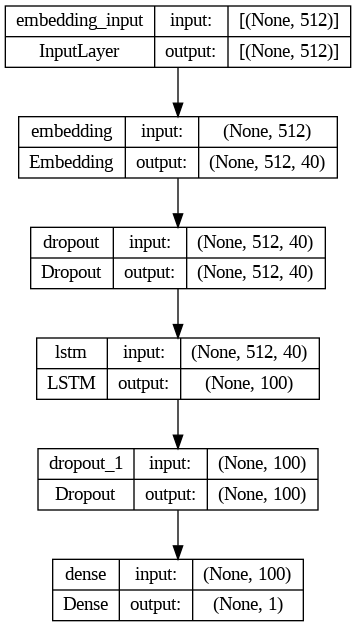

In [41]:
# plot the model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True)

 OBSERVATION:

 - We visualize and save the architecture of the Keras model.

<a id='training_model'></a>

### **Q8.4: Training the model (10 marks)**
- Use a validation split of 20% during the training
- Epochs: 10 minimum
- Define batch size
- Use callbacks

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

batch_size = 64
epochs = 10

#early_stop = EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(X_train_seq, y_train, validation_split=0.2, batch_size=batch_size, epochs=epochs)
                    #, callbacks=[early_stop])

Epoch 1/10
671/671 [==============================] - 153s 216ms/step - loss: 0.2716 - accuracy: 0.8833 - val_loss: 0.2148 - val_accuracy: 0.9335
Epoch 2/10
671/671 [==============================] - 82s 121ms/step - loss: 0.1128 - accuracy: 0.9619 - val_loss: 0.1693 - val_accuracy: 0.9365
Epoch 3/10
671/671 [==============================] - 51s 77ms/step - loss: 0.0638 - accuracy: 0.9795 - val_loss: 0.1817 - val_accuracy: 0.9511
Epoch 4/10
671/671 [==============================] - 43s 64ms/step - loss: 0.0589 - accuracy: 0.9807 - val_loss: 0.1385 - val_accuracy: 0.9546
Epoch 5/10
671/671 [==============================] - 34s 50ms/step - loss: 0.0417 - accuracy: 0.9865 - val_loss: 0.1608 - val_accuracy: 0.9542
Epoch 6/10
671/671 [==============================] - 28s 41ms/step - loss: 0.0201 - accuracy: 0.9941 - val_loss: 0.1680 - val_accuracy: 0.9542
Epoch 7/10
671/671 [==============================] - 30s 45ms/step - loss: 0.0184 - accuracy: 0.9940 - val_loss: 0.1957 - val_accura

 OBSERVATIONS:

 - The number of samples processed in each training batch is 64.

 - The number of times the model will iterate over the entire training dataset is 10.

 -The X_train_seq represents the padded input sequences, and y_train represents the corresponding target labels. The validation_split=0.2 parameter splits a portion (20%) of the training data for validation during training.

 -The EarlyStopping callback monitors the validation loss and stops training if the loss does not improve for a certain number of epochs (patience). The restore_best_weights=True parameter restores the weights of the model to the best weights observed during training. It is more efficient to use this feature and there wasn't much difference in the validation data accuracy with and without this step. I would recommned using the earlystop feature.

 - At the end of 10 epochs, the model achieved a training loss of 0.0107, training accuracy of 0.9969, validation loss of 0.2266, and validation accuracy of 0.9523.

 - These results indicate the progress of the model's learning over the epochs. The training loss and accuracy generally improved, while the validation loss and accuracy also showed positive trends. However, it's essential to consider the validation metrics as they indicate the model's performance on unseen data.

<a id='plotting_accuracy'></a>

### **Q8.5: Plot the Train/Validation Loss and Accuracy (5 marks)**

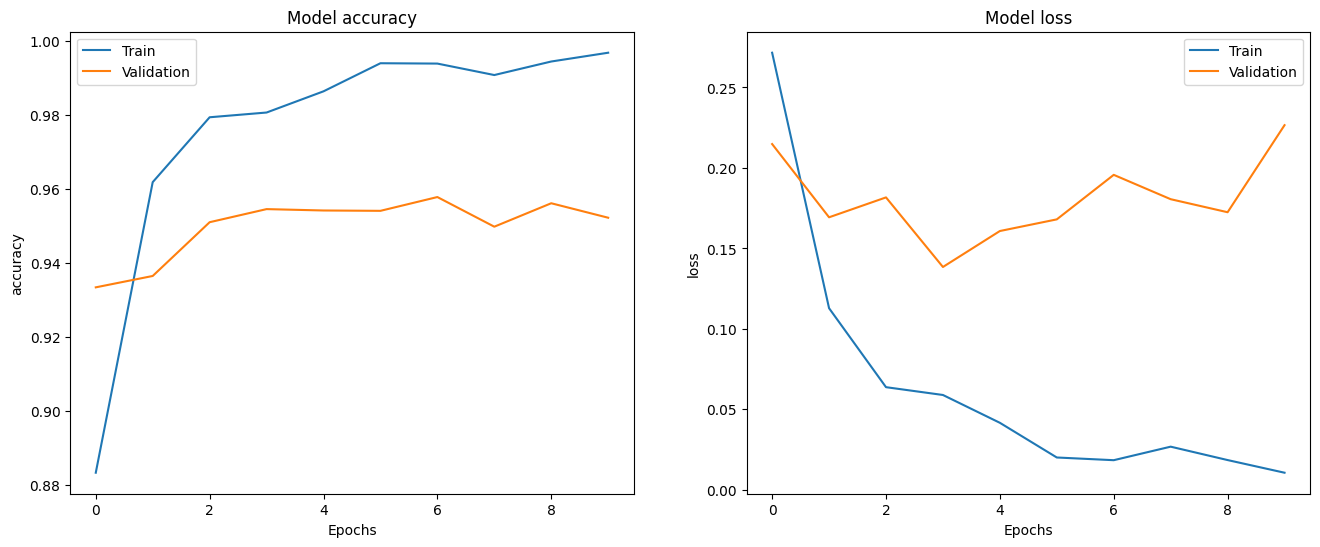

In [43]:
# plot the train/validation loss and accuracy
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_' + metric])
  plt.title('Model ' + metric)
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.legend(['Train', 'Validation'])


plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

 OBSERVATIONS:

 - The above plots show the model's performance during training, indicating the trend of the accuracy and loss values across epochs for both the training and validation sets.

- The model accuracy of the train set reaches a stable value after about 4 epochs. The validation accuracy reaches a stable value from the third epoch.

- The loss function for the train set drops dractically after the 4th epoch.

- Both the training loss and accuracy generally improved, while the validation loss and accuracy also showed positive trends as shown above.

<a id='evaluating_model'></a>

### **Q8.6: Evaluate the model (5 marks)**
- For final evaluation we use the separate test set

In [44]:
test_loss, test_acc = model.evaluate(X_test_seq, y_test)
y_hat = model.predict(X_test_seq)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

559/559 [==============================] - 6s 11ms/step
Test Loss: 0.2398534119129181
Test Accuracy: 0.9510204195976257


 OBSERVATIONS:

 - The test loss indicates the model's average loss on the test data, while the test accuracy represents the proportion of correctly predicted instances out of the total test instances.

 - The loss function measures how well the model is performing during training. It quantifies the discrepancy between the predicted outputs of the model and the true target values.

- The loss function serves as a guide for the model to update its internal parameters during the optimization process.  Lower loss value indicates a better fit, meaning that the model is able to make predictions that are closer to the true values.

- The test loss is 0.2398.

- However,  loss function alone does not provide a complete picture of the model's performance and should be used in conjunction with other evaluation metrics such as accuracy.

- Test accuracy measures the proportion of correctly classified instances in the test dataset out of the total number of instances. Test accuracy provides an indication of how well the model generalizes to new, unseen data.

- The test accuracy is 95%

<a id='classification_report'></a>

### **Q8.7: Print the classification report (5 marks)**

In [45]:
# Obtain the predicted labels
y_pred = (y_hat > 0.5).astype(int)

# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8860
           1       0.97      0.93      0.95      9025

    accuracy                           0.95     17885
   macro avg       0.95      0.95      0.95     17885
weighted avg       0.95      0.95      0.95     17885



OBSERVATIONS:

- The classification report provides several evaluation metrics, including precision, recall, F1-score, and support.

- precision: Precision is the ratio of true positives to the sum of true positives and false positives. In this case, precision is reported separately for class 0 and class 1. For class 0, the precision is 0.93, indicating that out of all instances predicted as class 0, 93% were correct. For class 1, the precision is 0.97, meaning that out of all instances predicted as class 1, 97% were correct.

- recall: Recall, also known as sensitivity or true positive rate, is the ratio of true positives to the sum of true positives and false negatives. For class 0, the recall is 0.97, indicating that 97% of actual class 0 instances were correctly identified. For class 1, the recall is 0.93, meaning that 93% of actual class 1 instances were correctly identified.

- f1-score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of both metrics. The F1-score is 0.95 for both classes, indicating a good balance between precision and recall.

- accuracy: The accuracy is the overall proportion of correctly classified instances, calculated as the sum of true positives and true negatives divided by the total number of instances. The accuracy is reported as 0.95, indicating that 95% of instances in the test dataset were correctly classified.

- macro avg: The macro average calculates the average of the metrics for each class without considering class imbalance. The macro average precision, recall, and F1-score are all reported as 0.95.

- weighted avg: The weighted average calculates the average of the metrics for each class, weighted by the support of each class. The weighted average precision, recall, and F1-score are all reported as 0.95.



<a id='confusion_matrix'></a>

### **Q8.8: Plot the confusion matrix (5 marks)**

Text(70.72222222222221, 0.5, 'Real Labels')

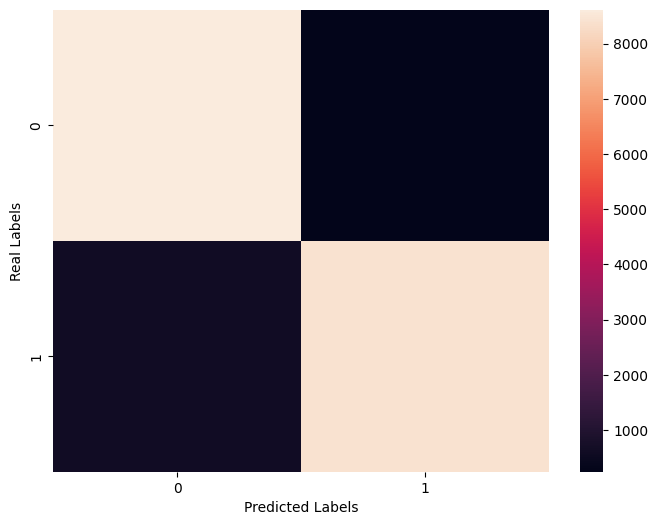

In [46]:
from sklearn.metrics import confusion_matrix

# plot the confusion matrix
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test, y_pred))

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

OBSERVATIONS:

- The confusion matrix is a tabular representation of the model's performance which shows the counts of true positives, true negatives, false positives, and false negatives.

- The x-axis label is set to 'Predicted Labels', indicating the predicted class labels, and the y-axis label is set to 'Real Labels', representing the true class labels.

- The True-Positives (TP) and True-Negatives (TN) have higher proportions as compared to the False-Positives (FP) and False-Negatives (FN).

- This indicates that the model has a good predictive power.


<a id='Conclusions_and_Learnings'></a>

##  **9. Conclusions and Learnings**

### **Q9: Add your Conclusions and Learnings from this project (5 marks)**

1. We have started with word preprocessing which is essential before feeding the text data into an LSTM (Long Short-Term Memory). By performing word processing steps, the LSTM model can focus on learning meaningful patterns and relationships in the text data. It improves the model's ability to generalize, reduces noise, and enhances the overall performance and accuracy of the LSTM-based NLP models.

2. As a part of word-preprocessing, we have done the following: Empty strings have been replaced by Null, and the null values have been dropped from the dataframe. Only alphabets have been retained for analysis. Unwanted spaces, stopwords and duplicate rows have been removed. All the texts have been converted into lower case.

3. We have then plotted the wordclouds for the fake and real data to vizualize the word frequency in those two corpora together and separately. There are some differences in the order of most frequently used words. Eg.: The words united state, new york occurs much more in the fake news as compared to the real news.


4. 75% of the data (53652 rows) has been used for training ang 25% of the data (17885 rows) has been used for testing. The 'random_state' parameter is set to 42 to ensure reproducibility of the split.

5. The we perform tokenization of the preprocessed data. Tokenization is the process of dividing a sequence of text into individual units called tokens.Tokenization of the data is done before splitting the data into training and testing sets to ensure that the same tokenization process is applied consistently across both sets. This helps to maintain the integrity of the data and ensures that the model is evaluated on the same tokenization scheme it was trained on.

6. We then pad these pre-processed, tokenized texts. These padded sequences will be used as input for feeding into the NN. The uniform length of the sequences is useful for maintaining consistent input dimensions in machine learning models.


7. We have then created the following Sequence model:

  - An embedding vector has been added, It is a dense vector representation of a word or a token in a text corpus. It is a learned representation that captures the semantic and syntactic relationships between words based on their usage patterns in the given dataset. Embedding layer in the model takes input sequences of length 512 and produces output tensors of shape (batch_size, 512, 40). The output tensors have a variable batch size and a fixed sequence length of 512, and each token in the input sequence is represented by a 40-dimensional embedding vector.

  - The Dropout layer helps prevent overfitting by randomly dropping a fraction of the inputs to the next layer during training. The number of trainable parameters is zero because the Dropout layer does not have any trainable parameters.

  - The LSTM layer is a type of recurrent neural network layer that is suitable for sequence data. The number 100 specifies the number of LSTM units or cells in the layer.

  - The last line adds a Dense layer with a single unit. The 1 represents the output dimension of the Dense layer, and activation='sigmoid' applies the sigmoid activation function to squash the output between 0 and 1, which is suitable for binary classification tasks.

8. We then compile the model and visualize the architecture:
  - We have chosen binary crossentropy as the loss function because this is a binary classification problem.

  - The accuracy parameter specifies the evaluation metrics to be computed during training and evaluation. This metric measures the proportion of correctly predicted instances out of the total instances.

9. The model is then trained with the following details:
  - The number of samples processed in each training batch is 64.

  - The number of times the model will iterate over the entire training dataset is 10.

  - The X_train_seq represents the padded input sequences, and y_train represents the corresponding target labels. The validation_split=0.2 parameter splits a portion (20%) of the training data for validation during training.

  - The EarlyStopping callback monitors the validation loss and stops training if the loss does not improve for a certain number of epochs (patience). The restore_best_weights=True parameter restores the weights of the model to the best weights observed during training. It is more efficient to use this feature and there wasn't much difference in the validation data accuracy with and without this step. I would recommned using the earlystop feature.

10. Here are the observations after training the data:
  - At the end of 10 epochs, the model achieved a training loss of 0.0107, training accuracy of 0.9969, validation loss of 0.2266, and validation accuracy of 0.9523.

  - These results indicate the progress of the model's learning over the epochs. The training loss and accuracy generally improved, while the validation loss and accuracy also showed positive trends. However, it's essential to consider the validation metrics as they indicate the model's performance on unseen data.

  -The training and validation loss and ccuracy graphs show the model's performance during training, indicating the trend of the accuracy and loss values across epochs for both the training and validation sets.

  - The model accuracy of the train set reaches a stable value after about 4 epochs. The validation accuracy reaches a stable value from the third epoch.

  - The loss function for the train set drops dractically after the 4th epoch.

  - Both the training loss and accuracy generally improved, while the validation loss and accuracy also showed positive trends as shown above.

11. Finally the model is tested on unseen data i.e., the etst data. Here is the summary of the results:

  - The test loss indicates the model's average loss on the test data, while the test accuracy represents the proportion of correctly predicted instances out of the total test instances.

  - The loss function measures how well the model is performing during training. It quantifies the discrepancy between the predicted outputs of the model and the true target values.

  - The loss function serves as a guide for the model to update its internal parameters during the optimization process. Lower loss value indicates a better fit, meaning that the model is able to make predictions that are closer to the true values.

  - The test loss is 0.2398.

  - However, loss function alone does not provide a complete picture of the model's performance and should be used in conjunction with other evaluation metrics such as accuracy.

  - Test accuracy measures the proportion of correctly classified instances in the test dataset out of the total number of instances. Test accuracy provides an indication of how well the model generalizes to new, unseen data.

  - The test accuracy is 95%


12. The classification report is a summary of the performance evaluation metrics for a classification model. It provides a detailed breakdown of the precision, recall, F1-score, and support for each class in a classification task. The classification report helps in assessing the quality and effectiveness of a classification model's predictions. Here is the summary of the classification report:

  -The classification report provides several evaluation metrics, including precision, recall, F1-score, and support.

  - precision: Precision is the ratio of true positives to the sum of true positives and false positives. In this case, precision is reported separately for class 0 and class 1. For class 0, the precision is 0.93, indicating that out of all instances predicted as class 0, 93% were correct. For class 1, the precision is 0.97, meaning that out of all instances predicted as class 1, 97% were correct.

  - recall: Recall, also known as sensitivity or true positive rate, is the ratio of true positives to the sum of true positives and false negatives. For class 0, the recall is 0.97, indicating that 97% of actual class 0 instances were correctly identified. For class 1, the recall is 0.93, meaning that 93% of actual class 1 instances were correctly identified.

  - f1-score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of both metrics. The F1-score is 0.95 for both classes, indicating a good balance between precision and recall.

  - accuracy: The accuracy is the overall proportion of correctly classified instances, calculated as the sum of true positives and true negatives divided by the total number of instances. The accuracy is reported as 0.95, indicating that 95% of instances in the test dataset were correctly classified.

  - macro avg: The macro average calculates the average of the metrics for each class without considering class imbalance. The macro average precision, recall, and F1-score are all reported as 0.95.

  - weighted avg: The weighted average calculates the average of the metrics for each class, weighted by the support of each class. The weighted average precision, recall, and F1-score are all reported as 0.95.

13. Finally, the confusion matrix shows that the True-Positives (TP) and True-Negatives (TN) have much higher proportions as compared to the False-Positives (FP) and False-Negatives (FN).

This indicates that the model has a good predictive power and can effectively classify between real and fake news with an accuracy of 95%.

